In [3]:
#Importing necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [4]:
# Load UCI Adult Income dataset
def load_adult_income_data():
    
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
    column_names = [
        "age", "workclass", "fnlwgt", "education", "education_num", "marital_status",
        "occupation", "relationship", "race", "sex", "capital_gain", "capital_loss",
        "hours_per_week", "native_country", "income"
    ]
    data = pd.read_csv(url, names=column_names, sep=",\s*", na_values="?", engine="python")
    
    # Drop missing values 
    data.dropna(inplace=True)
    data = data.sample(n=5000, random_state=42)
    
    #  categorical variables to numeric
    for column in data.select_dtypes(include=["object"]).columns:
        data[column] = LabelEncoder().fit_transform(data[column])
    
    X = data.drop("income", axis=1)
    y = data["income"]
    return X, y

In [5]:
# specificity
def specificity_score(y_true, y_pred):
    cm = metrics.confusion_matrix(y_true, y_pred)
    TN = cm[0, 0] if cm.shape == (2, 2) else np.sum(cm) - np.sum(cm[0]) - np.sum(cm[:, 0]) + cm[0, 0]
    FP = np.sum(cm[0]) - cm[0, 0]
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    return specificity


In [6]:
#  confusion matrix
def plot_confusion_matrix(y_true, y_pred, dataset_name, kernel_name):
    cm = metrics.confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix for {dataset_name} - {kernel_name} Kernel")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

In [7]:

def run_svm_with_metrics_and_confusion_matrix():
    # dataset-loading
    datasets_dict = {
        "Breast Cancer": datasets.load_breast_cancer(),
        "Iris": datasets.load_iris(),
        "Wine Quality": datasets.load_wine(),
        "Adult Income": load_adult_income_data(),
        "Digits": datasets.load_digits()
    }
    
    # kernel types
    kernels = ['linear', 'poly', 'rbf', 'sigmoid']
    
    # Dictionary to store results
    results = []

    # Loop through datasets
    for name, data in datasets_dict.items():
        print(f"\n\n===== Dataset: {name} =====")
        
        # Handle dataset format for UCI Adult Income and other Scikit-Learn datasets
        if name == "Adult Income":
            X_full, y_full = data
        else:
            X_full = data.data
            y_full = data.target
        
        # Split dataset
        X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=0.2, random_state=42)
        
        # Standardize features
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        
        # Loop through kernels and train SVM models
        for kernel in kernels:
            # Initialize SVM with current kernel
            model = svm.SVC(kernel=kernel)
            
            # Train model
            model.fit(X_train, y_train)
            
            # Predict on test set
            y_pred = model.predict(X_test)
            
            # Compute metrics
            accuracy = metrics.accuracy_score(y_test, y_pred)
            sensitivity = metrics.recall_score(y_test, y_pred, average='macro')  # Macro average for multiclass
            specificity = specificity_score(y_test, y_pred)
            kappa = metrics.cohen_kappa_score(y_test, y_pred)
            
            # Append results to list
            results.append({
                "Dataset": name,
                "Kernel": kernel,
                "Accuracy": accuracy,
                "Sensitivity": sensitivity,
                "Specificity": specificity,
                "Kappa": kappa
            })

            # Plot confusion matrix
            plot_confusion_matrix(y_test, y_pred, dataset_name=name, kernel_name=kernel)

    # Convert results to DataFrame for better readability
    results_df = pd.DataFrame(results)
    print("\n\n===== Metrics Table =====")
    print(results_df)





===== Dataset: Breast Cancer =====


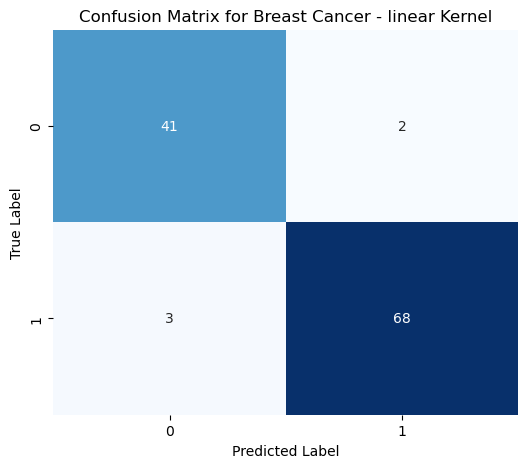

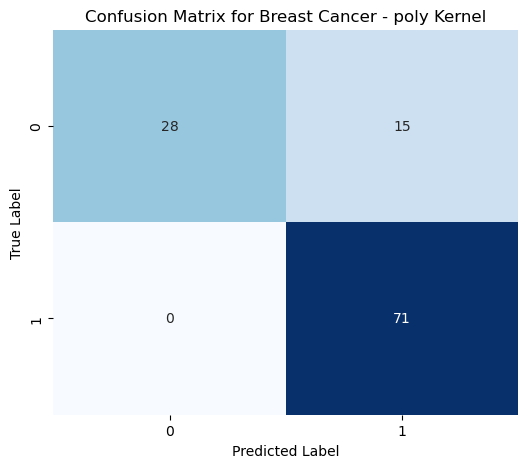

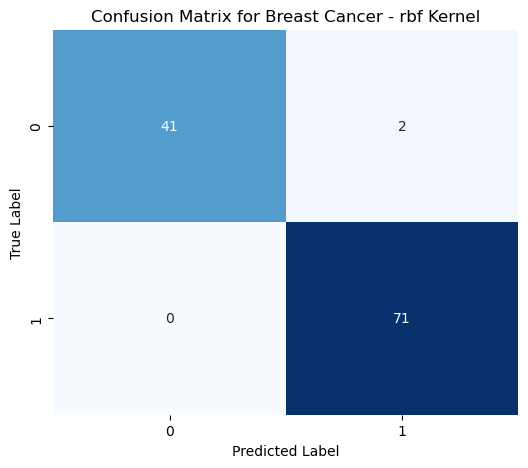

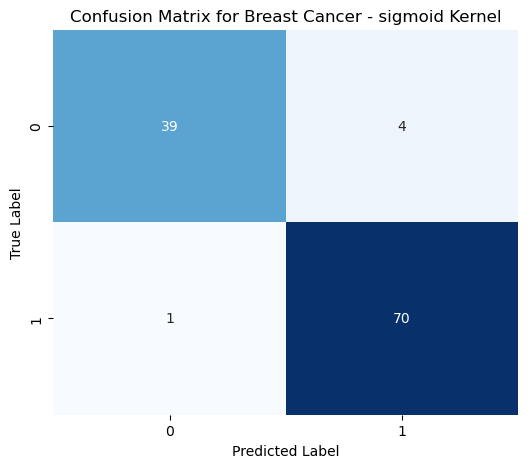



===== Dataset: Iris =====


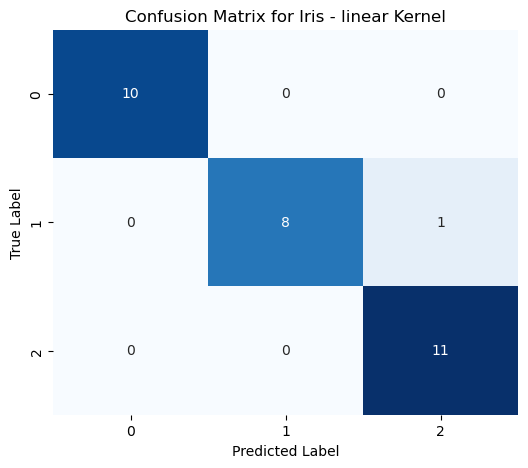

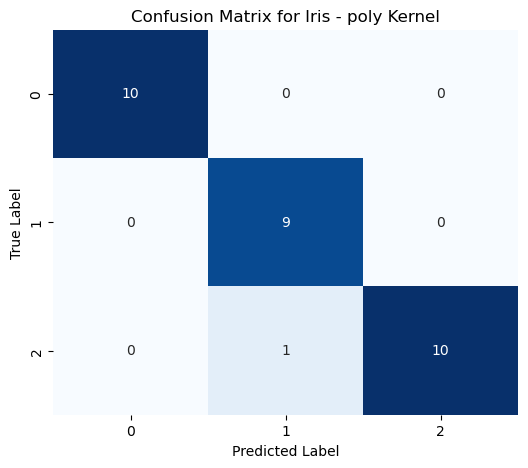

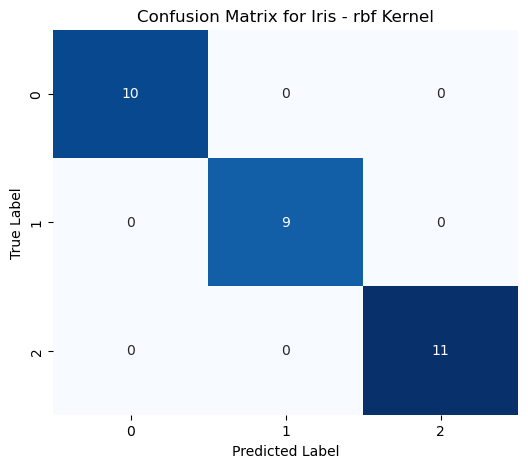

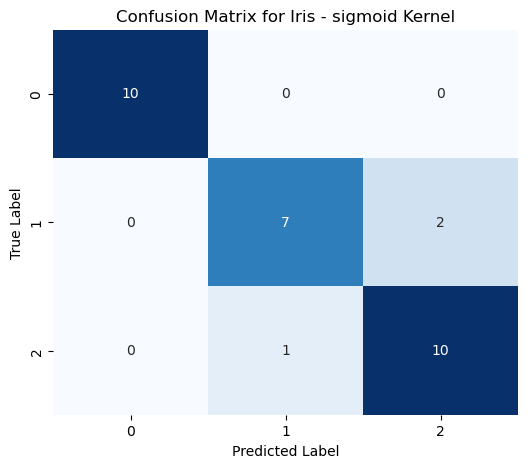



===== Dataset: Wine Quality =====


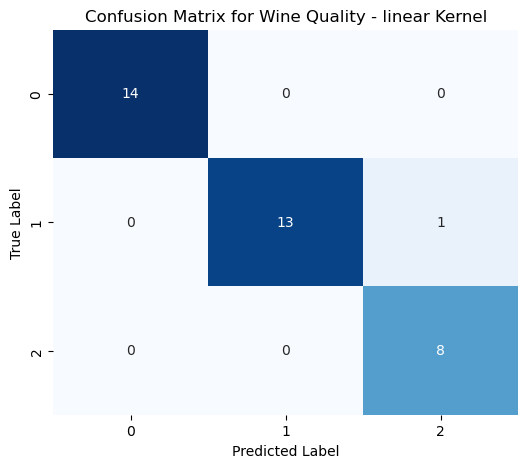

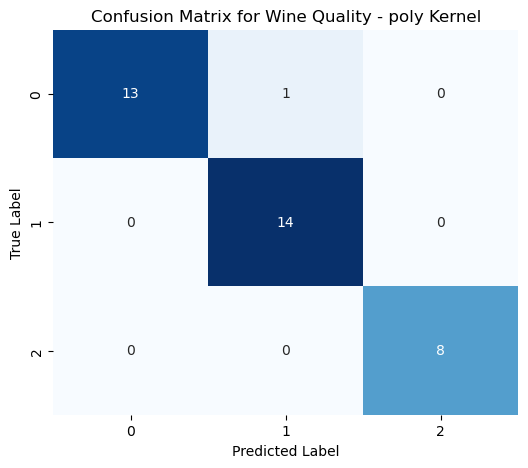

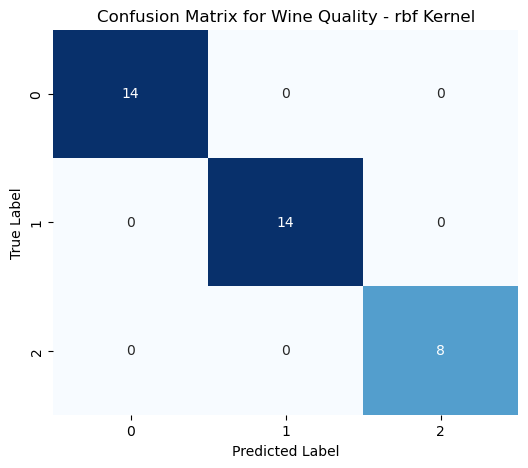

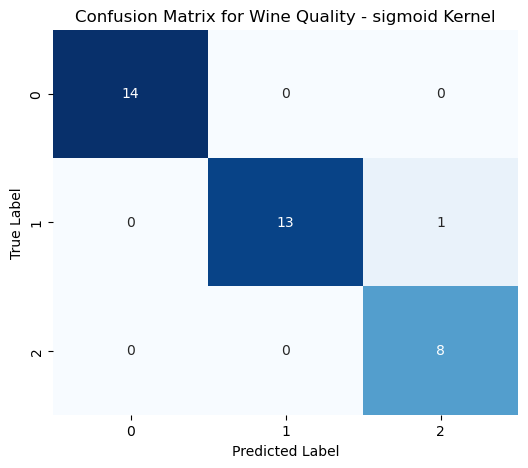



===== Dataset: Adult Income =====


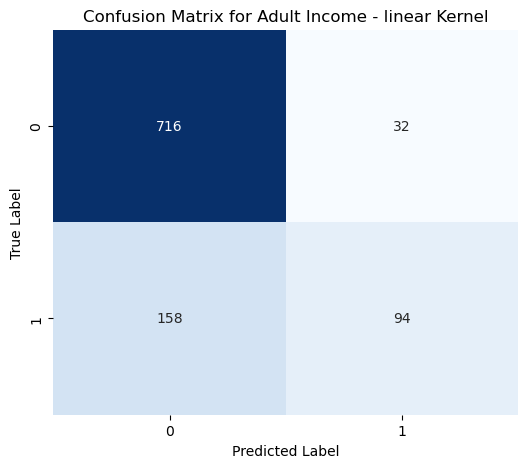

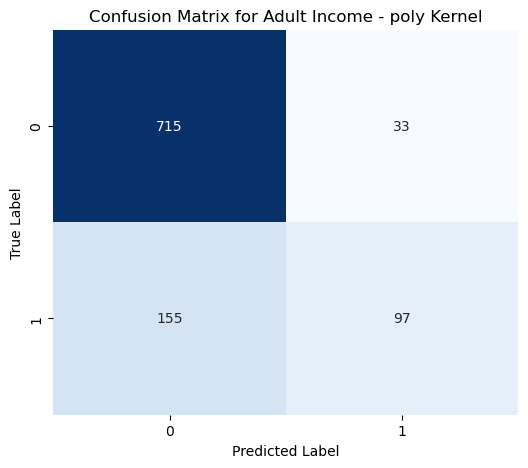

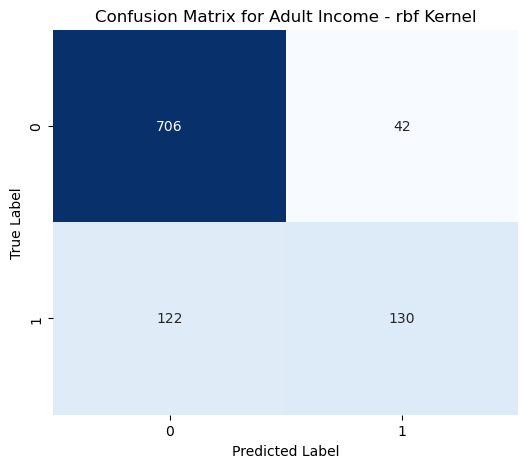

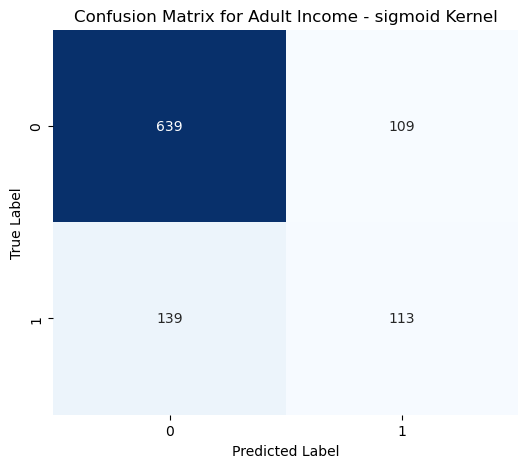



===== Dataset: Digits =====


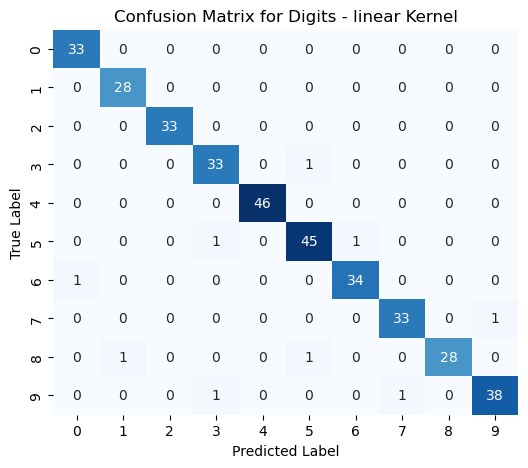

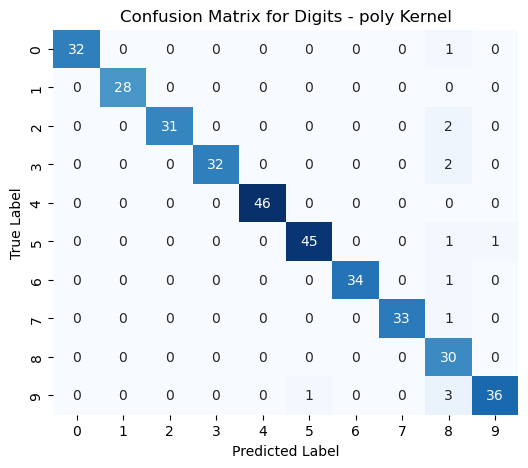

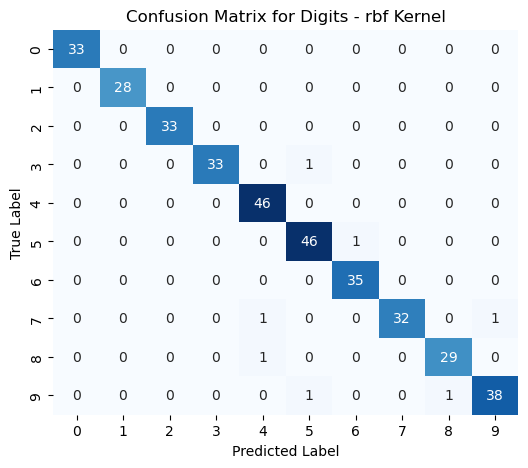

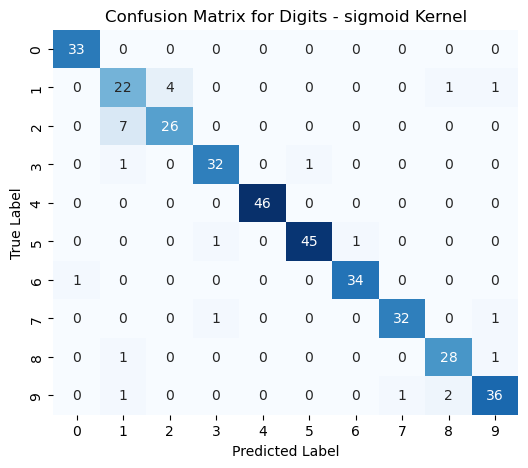



===== Metrics Table =====
          Dataset   Kernel  Accuracy  Sensitivity  Specificity     Kappa
0   Breast Cancer   linear  0.956140     0.955617     0.953488  0.907075
1   Breast Cancer     poly  0.868421     0.825581     0.651163  0.699261
2   Breast Cancer      rbf  0.982456     0.976744     0.953488  0.962314
3   Breast Cancer  sigmoid  0.956140     0.946446     0.906977  0.905347
4            Iris   linear  0.966667     0.962963     1.000000  0.949664
5            Iris     poly  0.966667     0.969697     1.000000  0.950000
6            Iris      rbf  1.000000     1.000000     1.000000  1.000000
7            Iris  sigmoid  0.900000     0.895623     1.000000  0.848993
8    Wine Quality   linear  0.972222     0.976190     1.000000  0.957447
9    Wine Quality     poly  0.972222     0.976190     0.956522  0.957143
10   Wine Quality      rbf  1.000000     1.000000     1.000000  1.000000
11   Wine Quality  sigmoid  0.972222     0.976190     1.000000  0.957447
12   Adult Income   lin

In [8]:
# Run SVM with metrics and confusion matrices for all datasets and kernels
run_svm_with_metrics_and_confusion_matrix()
